<h1>Cats vs Dogs </h1>
 
<h2>Download your dataset here<a href="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip">Dataset</a></h1>

In [7]:
import os
import tensorflow as tf

train_dog_dir='C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\train\\dogs'
train_cat_dir='C:\\Users\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\train\\cats'

validation_dog_dir='C:\\Users\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\validation\\dogs'
validation_cat_dir='C:\\Users\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\validation\\cats'


In [8]:
train_dog_name=os.listdir(train_dog_dir)
train_cat_name=os.listdir(train_cat_dir)

validation_dog_name=os.listdir(validation_dog_dir)
validation_cat_name=os.listdir(validation_dog_dir)

In [13]:
print('total training cat images :', len(os.listdir(      train_cat_dir ) ))
print('total training dog images :', len(os.listdir(      train_dog_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cat_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dog_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


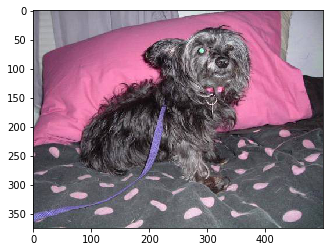

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path_dog=os.path.join(train_dog_dir,train_dog_name[0])
img_path_cat=os.path.join(train_cat_dir,train_cat_name[0])

img=mpimg.imread(img_path_dog)
plt.imshow(img)

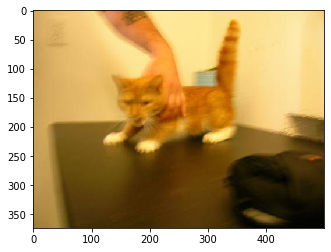

In [20]:
img=mpimg.imread(img_path_cat)
plt.imshow(img)

In [24]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid') 
    
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(
'C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\train\\',
 batch_size=20,
 class_mode='binary',
 target_size=(150,150))

validation_generator=test_datagen.flow_from_directory(
'C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Untitled Folder\\tmp\\cats_and_dogs_filtered\\validation\\',
batch_size=20,
class_mode='binary',
target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 95s - loss: 0.8530 - accuracy: 0.5595 - val_loss: 0.6918 - val_accuracy: 0.5080
Epoch 2/15
100/100 - 103s - loss: 0.6325 - accuracy: 0.6620 - val_loss: 0.6141 - val_accuracy: 0.6760
Epoch 3/15
100/100 - 94s - loss: 0.5723 - accuracy: 0.7400 - val_loss: 0.5867 - val_accuracy: 0.7080
Epoch 4/15
100/100 - 93s - loss: 0.4829 - accuracy: 0.7835 - val_loss: 0.5401 - val_accuracy: 0.7260
Epoch 5/15
100/100 - 92s - loss: 0.3806 - accuracy: 0.8365 - val_loss: 0.6080 - val_accuracy: 0.7210
Epoch 6/15
100/100 - 103s - loss: 0.3167 - accuracy: 0.8675 - val_loss: 0.7461 - val_accuracy: 0.6950
Epoch 7/15
100/100 - 97s - loss: 0.2327 - accuracy: 0.9040 - val_loss: 0.7118 - val_accuracy: 0.7090
Epoch 8/15
100/100 - 90s - loss: 0.1756 - accuracy: 0.9325 - val_loss: 0.8827 - val_accuracy: 0.7220
Epoch 9/15
100/100 - 102s - loss: 0.1371 - accuracy: 0.9520 - val_loss: 1.0381 - val_accuracy: 0.

Text(0.5, 1.0, 'Training and validation loss')

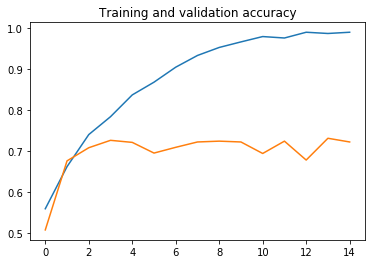

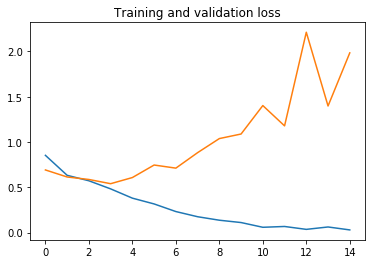

In [37]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )